In [3]:
# Identity Transformation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img_path = r"a1images\brain_proton_density_slice.png"
f = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

x = np.arange(256)
t_f = np.zeros_like(x, dtype=np.float32)

# 0–50: y = x
m1 = x <= 185
t_f[m1] = 0

# 50–150: y = 100 + 1.55*(x-50)
#m2 = (x > 100) & (x <= 150)
#t_f[m2] = 100 + 1.55 * (x[m2] - 50)

# 150–255: y = x
m3 = x > 185
t_f[m3] = 255

t = np.clip(np.rint(t_f), 0, 255).astype(np.uint8)
g = t[f]       

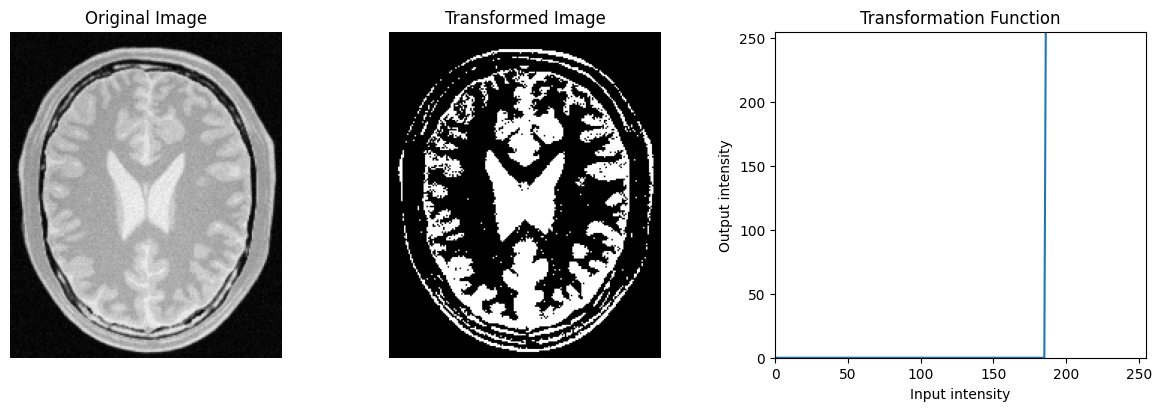

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[1].axis('off')

ax[2].plot(np.arange(256), t)
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_title('Transformation Function')
ax[2].set_xlabel('Input intensity')
ax[2].set_ylabel('Output intensity')

plt.show()